In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

wine = pd.read_csv('winequality-red.csv')

In [8]:
#if the wine has a quality higher than 6 then it is considered good
wine['quality'] = pd.cut(wine['quality'], bins = [0, 6.5, float('Inf')], labels = [float(1), float(0)])

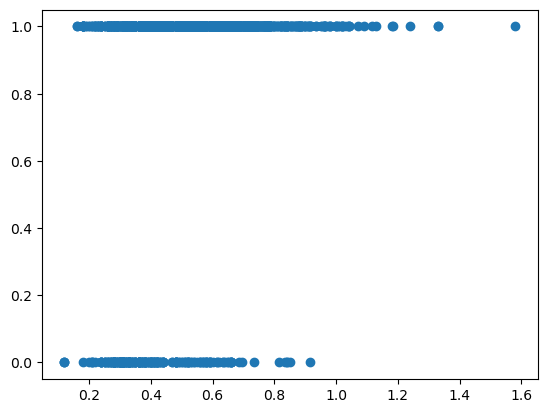

In [9]:
quality = wine['quality']
volatile_acidity = wine['volatile acidity']
plt.scatter(volatile_acidity, quality)


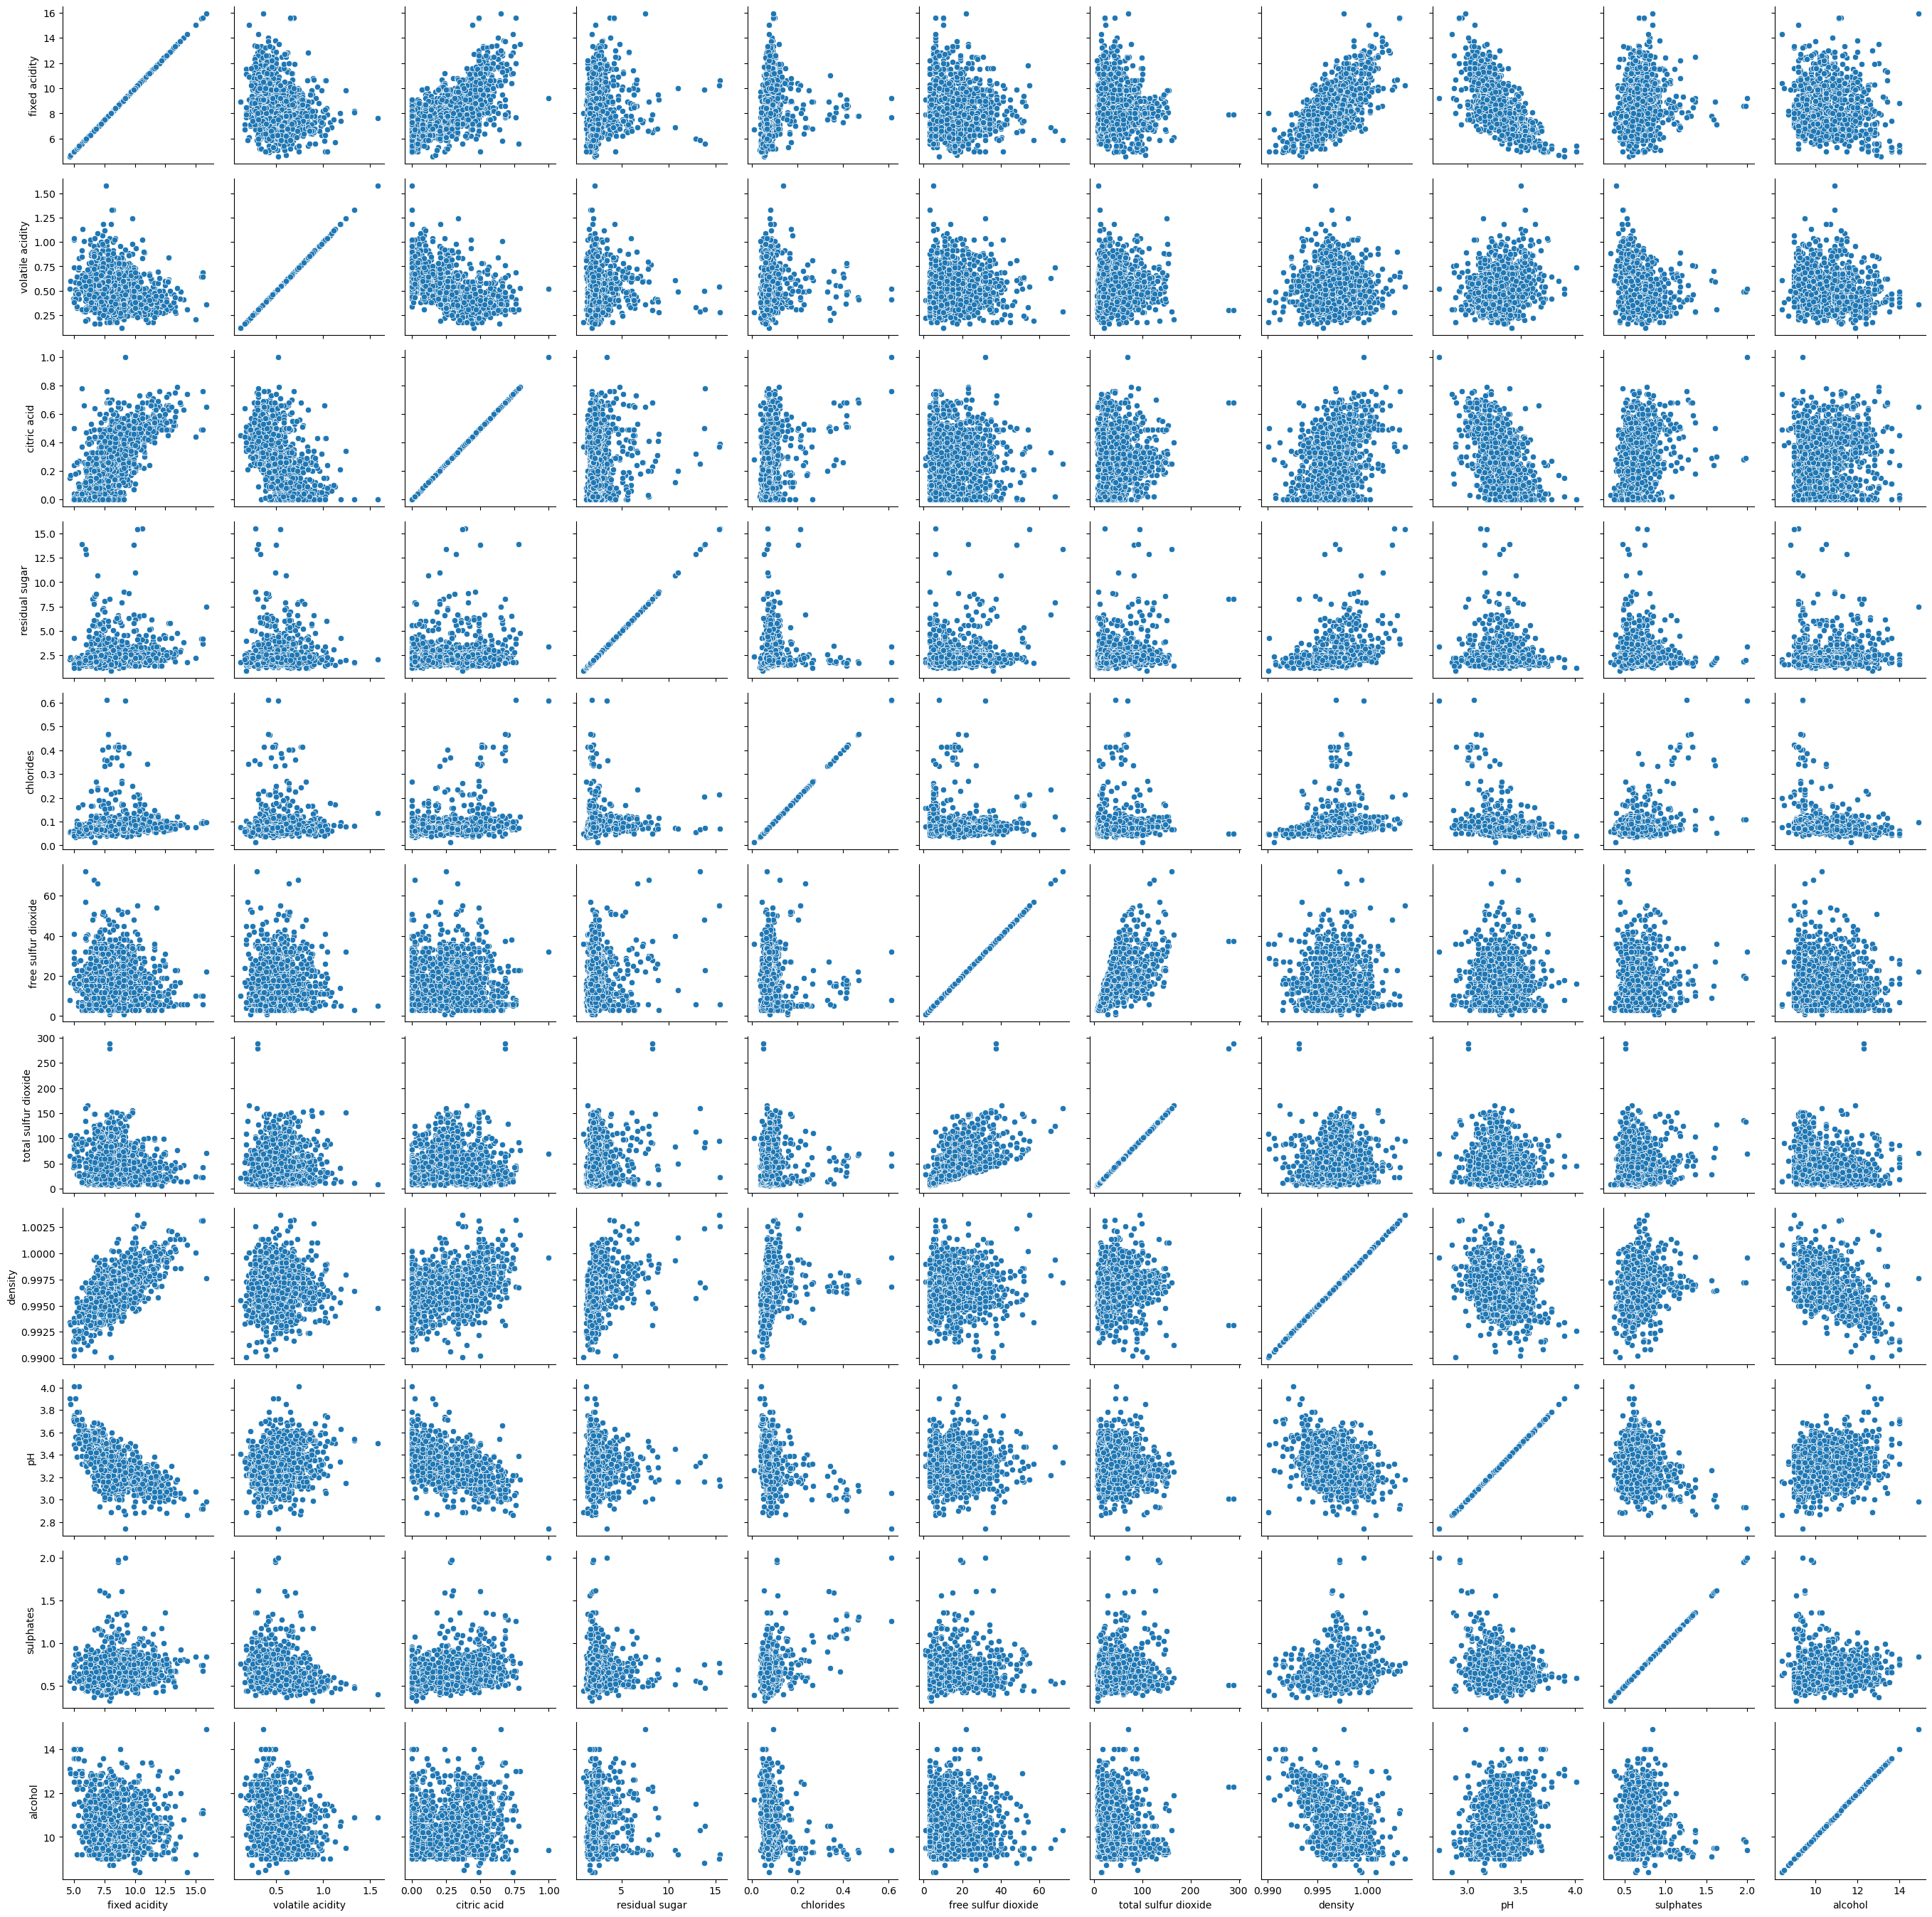

In [10]:
g = sns.PairGrid(wine)
g.map(sns.scatterplot)

c:\Users\Zac\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


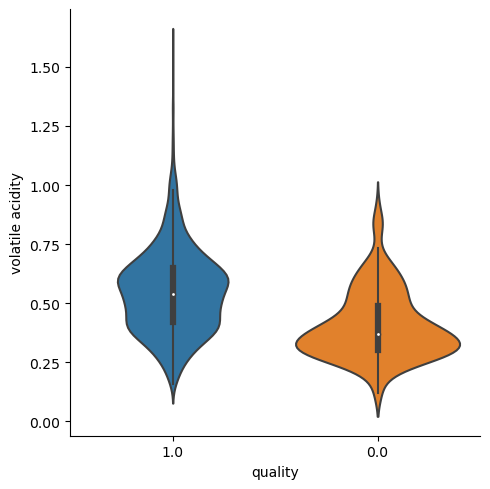

In [11]:
sns.catplot(x = "quality", y = "volatile acidity",
            kind = "violin", data = wine)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = wine[features]
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #create train and testing data using all features of dataset


In [14]:
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print('Predicted labels: ', pred)
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.62      0.23      0.33        44
         1.0       0.89      0.98      0.93       276

    accuracy                           0.88       320
   macro avg       0.76      0.60      0.63       320
weighted avg       0.85      0.88      0.85       320

Predicted labels:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

c:\Users\Zac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#use confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 10,  34],
       [  6, 270]], dtype=int64)

c:\Users\Zac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Zac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


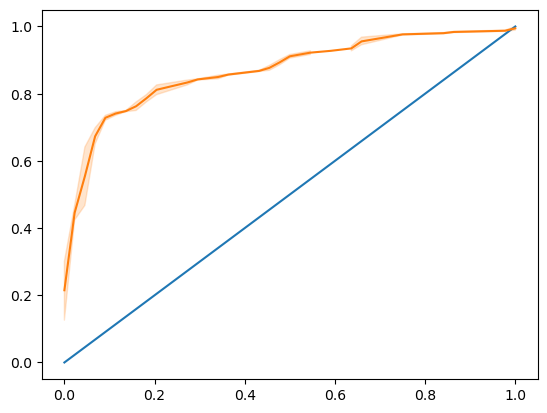

In [16]:
# visualise ROC curve (Receiving Operating Characteristic)
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)
plt.show()

In [17]:
#Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_scores[:, 1])
print(auc)

0.871870882740448
